<a href="https://colab.research.google.com/github/Alam710/Python_Basic_and_exam_machine_learning_MTI/blob/master/Islam_Nur_Alam_UAS_Macahine_Learning_No2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [3]:
df = pd.read_csv("/content/drive/MyDrive/UAS_ML/EmployeeSatisfactionIndex.csv", sep=",", parse_dates=[0])
df

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [4]:
df.columns

Index(['age', 'Dept', 'location', 'education', 'recruitment_type', 'job_level',
       'rating', 'onsite', 'awards', 'certifications', 'salary', 'satisfied'],
      dtype='object')

In [5]:
num_colums = ['age','job_level','rating','onsite','awards','certifications','salary','satisfied']
df_numerical = df[num_colums]
df_numerical

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,5,2,0,1,0,86750,1
1,50,3,5,1,2,1,42419,0
2,43,4,1,0,2,0,65715,0
3,44,2,3,1,0,0,29805,1
4,33,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...
495,49,2,5,0,6,0,29805,1
496,24,2,4,0,2,0,29805,0
497,34,1,3,0,2,0,24076,1
498,26,2,1,1,1,1,29805,0


In [6]:
categorical_colums = df.columns.drop(num_colums)
categorical_colums

Index(['Dept', 'location', 'education', 'recruitment_type'], dtype='object')

In [7]:
df_categorical = df[categorical_colums]
df_categorical

,Dept,location,education,recruitment_type
0,HR,Suburb,PG,Referral
1,Technology,Suburb,PG,Walk-in
2,Technology,Suburb,UG,Referral
3,Sales,City,PG,On-Campus
4,HR,City,UG,Recruitment Agency
...,...,...,...,...
495,HR,Suburb,PG,On-Campus
496,Technology,Suburb,UG,Referral
497,Marketing,City,PG,On-Campus
498,Technology,City,UG,On-Campus


<function matplotlib.pyplot.show>

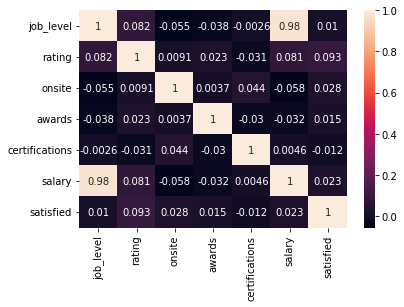

In [8]:
CorrMat = df_numerical.corr()
sns.heatmap(CorrMat, annot=True)
plt.show

In [9]:
df.isnull().sum()

age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               500 non-null    object
 1   Dept              500 non-null    object
 2   location          500 non-null    object
 3   education         500 non-null    object
 4   recruitment_type  500 non-null    object
 5   job_level         500 non-null    int64 
 6   rating            500 non-null    int64 
 7   onsite            500 non-null    int64 
 8   awards            500 non-null    int64 
 9   certifications    500 non-null    int64 
 10  salary            500 non-null    int64 
 11  satisfied         500 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 47.0+ KB


# Encoding Categorical Data

In [11]:
one_hot_encoding = pd.get_dummies(df_categorical)
one_hot_encoding

,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,education_PG,education_UG,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,1,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,1,0,1,1,0,0,0,0,1
2,0,0,0,0,1,0,1,0,1,0,0,1,0
3,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,0,0,1,1,0,1,0,0,0
496,0,0,0,0,1,0,1,0,1,0,0,1,0
497,0,1,0,0,0,1,0,1,0,1,0,0,0
498,0,0,0,0,1,1,0,0,1,1,0,0,0


In [12]:
CorrMat = one_hot_encoding.join(df['satisfied']).corr()
CorrMat

,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,education_PG,education_UG,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in,satisfied
Dept_HR,1.000000,-0.251211,-0.273861,-0.246302,-0.256097,-0.008892,0.008892,-0.018088,0.018088,-0.013245,-0.010654,0.058178,-0.035162,-0.027008
Dept_Marketing,-0.251211,1.000000,-0.255717,-0.229984,-0.239130,-0.083766,0.083766,-0.012849,0.012849,-0.014653,-0.018831,-0.010319,0.042988,-0.060954
Dept_Purchasing,-0.273861,-0.255717,1.000000,-0.250720,-0.260690,0.024604,-0.024604,0.025463,-0.025463,0.021991,-0.006403,-0.028179,0.012165,0.045265
Dept_Sales,-0.246302,-0.229984,-0.250720,1.000000,-0.234457,0.044872,-0.044872,0.074996,-0.074996,0.076255,0.001605,-0.083387,0.005298,0.026959
Dept_Technology,-0.256097,-0.239130,-0.260690,-0.234457,1.000000,0.022545,-0.022545,-0.068367,0.068367,-0.069188,0.034672,0.061000,-0.024104,0.014651
location_City,-0.008892,-0.083766,0.024604,0.044872,0.022545,1.000000,-1.000000,-0.092648,0.092648,0.055311,-0.028635,-0.062425,0.033897,0.030188
location_Suburb,0.008892,0.083766,-0.024604,-0.044872,-0.022545,-1.000000,1.000000,0.092648,-0.092648,-0.055311,0.028635,0.062425,-0.033897,-0.030188
education_PG,-0.018088,-0.012849,0.025463,0.074996,-0.068367,-0.092648,0.092648,1.000000,-1.000000,0.003947,-0.076449,-0.032279,0.100613,0.027208
education_UG,0.018088,0.012849,-0.025463,-0.074996,0.068367,0.092648,-0.092648,-1.000000,1.000000,-0.003947,0.076449,0.032279,-0.100613,-0.027208
recruitment_type_On-Campus,-0.013245,-0.014653,0.021991,0.076255,-0.069188,0.055311,-0.055311,0.003947,-0.003947,1.000000,-0.315981,-0.358687,-0.353123,0.018510


In [13]:
df_numerical.columns

Index(['age', 'job_level', 'rating', 'onsite', 'awards', 'certifications',
       'salary', 'satisfied'],
      dtype='object')

# Normalization 

In [14]:
df['age'] = df['age'].astype('int64')

In [15]:
"""df_numerical = df[['job_level', 'salary','onsite','rating','awards','certifications']]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_normalization = min_max_scaler.fit_transform(df_numerical)
df_normalization """

df_normalization = df[["age", "job_level", "rating", "onsite","awards", "certifications", "salary"]]

x_min = np.min(df_normalization)
x_max = np.max(df_normalization)

def normalization(x):
  return (x-x_min)/(x_max-x_min)

df_normalization = normalization(df_normalization)
df_normalization

,age,job_level,rating,onsite,awards,certifications,salary
0,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000
1,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673
2,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374
3,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410
4,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410
...,...,...,...,...,...,...,...
495,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410
496,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410
497,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000
498,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410


# Encoded Data

In [16]:
df_encoded = one_hot_encoding.join(df_normalization).join(df['satisfied']).dropna()
df_encoded.reset_index(inplace=True)
df_encoded.drop(['location_City','education_PG','index'], axis=1, inplace=True) 
df_encoded

,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_Suburb,education_UG,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in,age,job_level,rating,onsite,awards,certifications,salary,satisfied
0,1,0,0,0,0,1,0,0,0,1,0,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1
1,0,0,0,0,1,1,0,0,0,0,1,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0
2,0,0,0,0,1,1,1,0,0,1,0,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0
3,0,0,0,1,0,0,0,1,0,0,0,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,1
4,1,0,0,0,0,0,1,0,1,0,0,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,0,1,0,1,0,0,0,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410,1
496,0,0,0,0,1,1,1,0,0,1,0,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410,0
497,0,1,0,0,0,0,0,1,0,0,0,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000,1
498,0,0,0,0,1,0,1,1,0,0,0,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410,0


# Spliting Data

In [17]:
x_train = df_encoded.iloc[:400].drop(columns=['satisfied'])
x_test = df_encoded.iloc[400:].drop(columns=['satisfied'])
x_data = df_encoded.drop(columns=['satisfied'])

y_train = df_encoded.iloc[:400]['satisfied']
y_test = df_encoded.iloc[400:]['satisfied']
y_data = df_encoded['satisfied']

In [18]:
x_train.shape

(400, 18)

In [27]:
y_train, y_train.shape

(0      1
 1      0
 2      0
 3      1
 4      1
       ..
 395    1
 396    1
 397    1
 398    0
 399    0
 Name: satisfied, Length: 400, dtype: int64, (400,))

# binary classification using Artificial Neural Network 

Builiding Model 

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(18,), name="input_layer"),
  # tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, input_shape=(19,), name="input_layer"),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="hidden_layer"),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="hidden_layer_2"),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid, name="output_layer")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 18)                0         
                                                                 
 hidden_layer (Dense)        (None, 32)                608       
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 hidden_layer_3 (Dense)      (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [22]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint

In [23]:
# compiling model 
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["binary_accuracy"])

In [24]:
# Hyperparameter Training and Setting Training
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=1e-1, patience=10, mode='min', cooldown=10, min_delta=0)
early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=100, mode='min', restore_best_weights=True)
callbacks_list = [early_stop, reduce_lr]
batch_size = 1

In [25]:
history = model.fit(x_train,
                    y_train,
                    epochs=101,
                    callbacks=callbacks_list,
                    batch_size=batch_size
                    )

Epoch 1/101
400/400 [==============================] - 7s 4ms/step - loss: 0.6986 - binary_accuracy: 0.4800 - lr: 0.0010
Epoch 2/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6885 - binary_accuracy: 0.5450 - lr: 0.0010
Epoch 3/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6815 - binary_accuracy: 0.5750 - lr: 0.0010
Epoch 4/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6050 - lr: 0.0010
Epoch 5/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6548 - binary_accuracy: 0.6125 - lr: 0.0010
Epoch 6/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6339 - binary_accuracy: 0.6425 - lr: 0.0010
Epoch 7/101
400/400 [==============================] - 1s 2ms/step - loss: 0.6158 - binary_accuracy: 0.6850 - lr: 0.0010
Epoch 8/101
400/400 [==============================] - 1s 2ms/step - loss: 0.5850 - binary_accuracy: 0.7025 - lr: 0.0010
Epoch 9/101
400/400 [===========

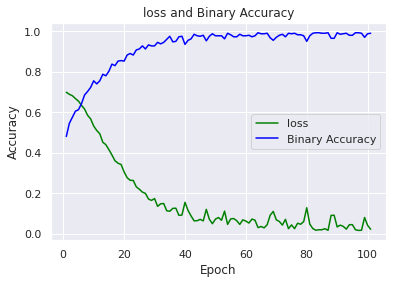

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

loss = history.history['loss']
bin_acc = history.history['binary_accuracy']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, loss, color='green', label='loss')
plt.plot(epochs, bin_acc, color='blue', label='Binary Accuracy')
plt.title('loss and Binary Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()